In [1]:
import numpy as np 
import pandas as pd
from pathlib import Path 

%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt

# import src.statsmodels as statsmodels 


matplotlib.rcParams.update({'font.size': 10})
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

matplotlib.rcParams['svg.fonttype'] = 'none'

fig_out_dir = Path("rebuttal_figs/")
fig_out_dir.mkdir(parents=True, exist_ok=True)



# Load in ANOVA results 

In [3]:
## Save out results 
out_dir = Path("final_results_dir")
out_name = "extended_data_figure_6_model_unit_ANOVA.pkl"

results_dict = pd.read_pickle(out_dir / out_name)

(0.0, 0.8)

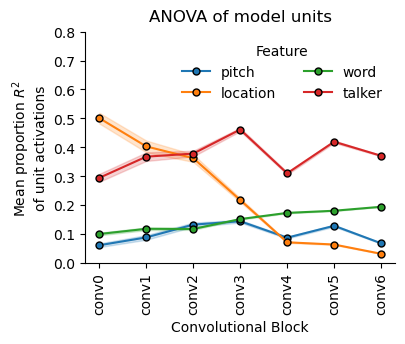

In [4]:
## get info for lineplot 
fig, ax = plt.subplots(figsize=(4,3))

var_thresh = 0.1


for ix, feature in enumerate(['pitch', 'location', 'word', 'talker']):
    
    mean_var_exp = np.zeros(len(results_dict))
    std_var_exp = np.zeros(len(results_dict))
    for layer, data in results_dict.items():
        # print(layer)
        layer_ix = int(layer.split("_")[-1])
        n = data['prop_var_exp'].shape[0]
        mean_var_exp[layer_ix] = np.nanmean(data['prop_var_exp'][:,ix])
        std_var_exp[layer_ix] = 2 *  np.nanstd(data['prop_var_exp'][:,ix]) / np.sqrt(n)
        
    ax.plot(
        np.arange(len(results_dict)),
        mean_var_exp,
        label=feature,
        color=f"C{ix}",
        marker='o',
        markersize=5,
        markeredgecolor='k',
        markeredgewidth=1,
        )
    ax.fill_between(
        np.arange(len(results_dict)),
        mean_var_exp+std_var_exp,
        mean_var_exp-std_var_exp,
        color=f"C{ix}",
        alpha=0.2,
        )

ax.set_ylabel(f'Mean proportion $R^2$\nof unit activations')
# plt.xlabel('Convolutional Block')
xtick_labels = [f"conv{i}" for i in range(len(results_dict))]
ax.set_title(f"ANOVA of model units", y=1.01)
ax.legend(title='Feature', frameon=False, ncol=2, loc='upper right')

ax.set_xticks(np.arange(len(results_dict)))
ax.set_xticklabels(xtick_labels, rotation=90)
ax.set_xlabel('Convolutional Block')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0, 0.8)

# plt.savefig(fig_out_dir / "sup_fig_11_unit_ANOVA.pdf", bbox_inches='tight', transparent=True)